## Bibliotecas para rodar o selenium





In [32]:
%%shell

cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF


apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg


cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.mKgjY1yyM7/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.n9d0OEUsBj/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.ENHiiB79Mz/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [33]:
!apt-get update
!apt-get install chromium chromium-driver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip3 install selenium==4.9.1

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://deb.debian.org/debian buster-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://deb.debian.org/debian-security buster/updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 6,555 B in 1s (4,479 B/s)
Reading package lists... Done
W: Skipping acquire of configur

In [34]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.chrome.options import Options # https://peter.sh/experiments/chromium-command-line-switches/

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument('--user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15') # TROCANDO O USER-AGENT Mozilla/5.0 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--window-size=1024x768')
wd = webdriver.Chrome('chromedriver',options=chrome_options, service_args=['--verbose', '--log-path=/tmp/chromedriver.log'])

# Importando processo de web-scrapping com Selenium

In [35]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By



```
# Isto está formatado como código
```

# Deletando cookies



In [36]:
wd.delete_all_cookies()

# Acessando a página


In [37]:
wd.get("https://www.imdb.com/chart/moviemeter/")

# Visualização da página web


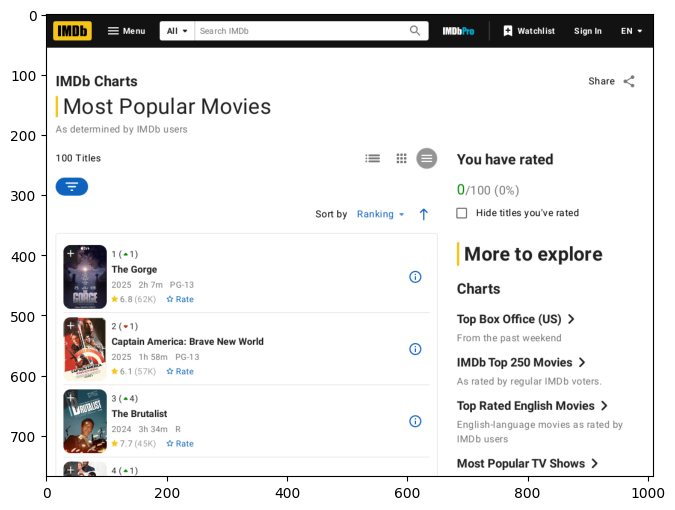

In [38]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

# Acessando a ordem de classificação, o Sort By

In [39]:
try:
  accept_button_popup = wd.find_element(By.XPATH, "//button[@class='BtnPair__RejectBtn']")
  accept_button_popup.click()
except:
  pass

# Click no botão para identificar as possíveis opções de classificação

In [40]:
wd.find_element(By.XPATH,"//select[@class='ipc-simple-select__input']").text

'Ranking\nIMDb rating\nRelease date\nNumber of ratings\nAlphabetical\nPopularity\nRuntime'

# Criei uma variável sort_by_movies onde salvei essas possíveis opções de classificação

In [41]:
from selenium.webdriver.support.ui import Select

sort_by_movies = Select(wd.find_element(By.XPATH,"//select[@class='ipc-simple-select__input']"))
print([i.text for i in sort_by_movies.options])

print (sort_by_movies)

['Ranking', 'IMDb rating', 'Release date', 'Number of ratings', 'Alphabetical', 'Popularity', 'Runtime']


# Escolhi a segunda opção, IMDb ratings, para a classificação

In [42]:
sort_by_movies.select_by_index("1")

# Conferindo se a classificação correta foi escolhida

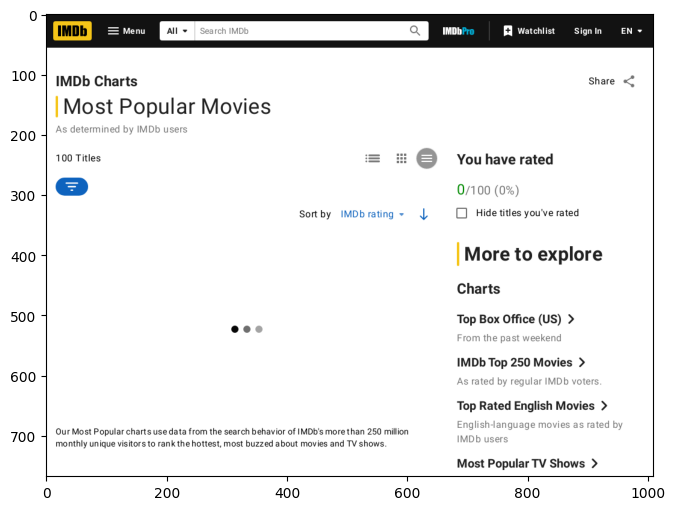

In [43]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

# Importando bibliotecas adicionais necessárias do Selenium


In [44]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [45]:
wd.implicitly_wait(10)  #esperando até 10s para elementos aparecerem
wd.get("https://www.imdb.com/chart/moviemeter/?sort=user_rating%2Cdesc")

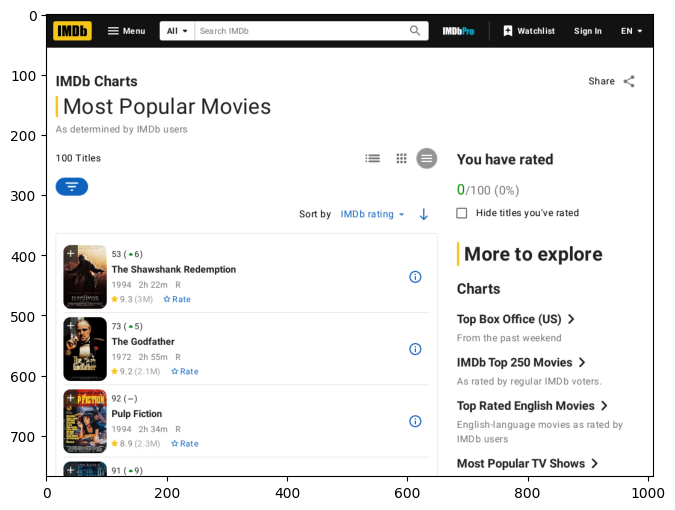

In [46]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

# Encontrando o path que contem as informações gerais do primeiro filme (primeiro elemento)

In [47]:
path_to_find = '//*[@id="__next"]/main/div/div[3]/section/div/div[2]/div/ul/li[1]/div/div/div/div/div[2]'

# Dar um tempo para load e puxar o elemento
wait = WebDriverWait(wd, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH, path_to_find)))

# Buscando os atributos do elemento

In [48]:
text = element.text
print("Text from the element:", text)

Text from the element: 53 (
6
)
The Shawshank Redemption
1994
2h 22m
R
9.3
 (3M)
Rate


# Loop para pegar as informações de um total de 10 elementos na tabela

In [49]:
# Wait for the list (ul) element to load
wait = WebDriverWait(wd, 10)
ul_element = wait.until(EC.presence_of_element_located((By.XPATH, "//*[@id='__next']/main/div/div[3]/section/div/div[2]/div/ul")))

# Get the first 10 li elements
li_elements = ul_element.find_elements(By.XPATH, ".//li")

# Loop through the first 10 elements and extract data
for i in range(min(10, len(li_elements))):
    li = li_elements[i]
    try:
        # Extract the title and other relevant information from each line
        title = li.find_element(By.XPATH, ".//div[2]//h3").text  # This is the title text
        year = li.find_element(By.XPATH, ".//div[3]//span[1]").text  # This is the year text (e.g., "2008–2013")
        length = li.find_element(By.XPATH, ".//div[2]//span[2]").text  # Episodes count
        rating = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--rating']").text  # Rating
        votes = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--voteCount']").text  # Vote count
        # Attempt to get the show type (TV Series)
        try:

            type_of_show = li.find_element(By.XPATH, ".//div[2]/span/span']").text  # Adjusted XPath for TV Series
        except:
            type_of_show = "Movie"  # Fallback value if the type is not found

        # Print the extracted information
        print(f"Title: {title}")
        print(f"Year: {year}")
        print(f"Length: {length}")
        print(f"Rating: {rating}")
        print(f"Votes: {votes}")
        print(f"Type: {type_of_show}")
        print("-" * 40)  # Separating lines for readability
    except Exception as e:
        print(f"Error extracting data for row {i + 1}: {e}")

Title: The Shawshank Redemption
Year: 1994
Length: 2h 22m
Rating: 9.3
Votes:  (3M)
Type: Movie
----------------------------------------
Title: The Godfather
Year: 1972
Length: 2h 55m
Rating: 9.2
Votes:  (2.1M)
Type: Movie
----------------------------------------
Title: Pulp Fiction
Year: 1994
Length: 2h 34m
Rating: 8.9
Votes:  (2.3M)
Type: Movie
----------------------------------------
Title: Inception
Year: 2010
Length: 2h 28m
Rating: 8.8
Votes:  (2.7M)
Type: Movie
----------------------------------------
Title: I'm Still Here
Year: 2024
Length: 2h 17m
Rating: 8.7
Votes:  (80K)
Type: Movie
----------------------------------------
Title: Interstellar
Year: 2014
Length: 2h 49m
Rating: 8.7
Votes:  (2.3M)
Type: Movie
----------------------------------------
Title: Gladiator
Year: 2000
Length: 2h 35m
Rating: 8.5
Votes:  (1.7M)
Type: Movie
----------------------------------------
Title: Dune: Part Two
Year: 2024
Length: 2h 46m
Rating: 8.5
Votes:  (603K)
Type: Movie
-------------------------

# Salvando essas informações numa variável

In [50]:
# Initialize an empty list to hold the extracted data
extracted_data = []

# Loop through the first 10 elements and extract data
for i in range(min(10, len(li_elements))):
    li = li_elements[i]
    try:
        # Extract the title and other relevant information from each line
        title = li.find_element(By.XPATH, ".//div[2]//h3").text  # This is the title text
        year = li.find_element(By.XPATH, ".//div[3]//span[1]").text  # This is the year text (e.g., "2008–2013")
        length = li.find_element(By.XPATH, ".//div[2]//span[2]").text  # Episodes count
        rating = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--rating']").text  # Rating
        votes = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--voteCount']").text  # Vote count

        # Attempt to get the show type (TV Series)
        try:
            type_of_show = li.find_element(By.XPATH, ".//div[@class='sc-300a8231-6']").text  # Adjusted XPath for TV Series
        except:
            type_of_show = "Movie"  # Fallback value if the type is not found

        # Append the extracted data as a dictionary to the list
        extracted_data.append({
            "Title": title,
            "Year": year,
            "Length": length,
            "Rating": rating,
            "Votes": votes,
            "Type": type_of_show
        })

    except Exception as e:
        print(f"Error extracting data for row {i + 1}: {e}")

In [51]:
import pandas as pd

In [52]:
# After the loop, create a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

# Print the DataFrame
print(df)

                      Title  Year  Length Rating    Votes   Type
0  The Shawshank Redemption  1994  2h 22m    9.3     (3M)  Movie
1             The Godfather  1972  2h 55m    9.2   (2.1M)  Movie
2              Pulp Fiction  1994  2h 34m    8.9   (2.3M)  Movie
3                 Inception  2010  2h 28m    8.8   (2.7M)  Movie
4            I'm Still Here  2024  2h 17m    8.7    (80K)  Movie
5              Interstellar  2014  2h 49m    8.7   (2.3M)  Movie
6                 Gladiator  2000  2h 35m    8.5   (1.7M)  Movie
7            Dune: Part Two  2024  2h 46m    8.5   (603K)  Movie
8                  Parasite  2019  2h 12m    8.5     (1M)  Movie
9               Oppenheimer  2023      3h    8.3   (858K)  Movie


# Manipulação: Ordenando por ano dos filmes em ordem decrescente

In [53]:
df_sorted = df.sort_values(by='Year', ascending=False)
print(df_sorted)

                      Title  Year  Length Rating    Votes   Type
4            I'm Still Here  2024  2h 17m    8.7    (80K)  Movie
7            Dune: Part Two  2024  2h 46m    8.5   (603K)  Movie
9               Oppenheimer  2023      3h    8.3   (858K)  Movie
8                  Parasite  2019  2h 12m    8.5     (1M)  Movie
5              Interstellar  2014  2h 49m    8.7   (2.3M)  Movie
3                 Inception  2010  2h 28m    8.8   (2.7M)  Movie
6                 Gladiator  2000  2h 35m    8.5   (1.7M)  Movie
0  The Shawshank Redemption  1994  2h 22m    9.3     (3M)  Movie
2              Pulp Fiction  1994  2h 34m    8.9   (2.3M)  Movie
1             The Godfather  1972  2h 55m    9.2   (2.1M)  Movie


# Manipulação: filtrando por filmes que tem avaliação entre 8.0 e 8.9


In [54]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

filtered_df = df[(df['Rating'] >= 8.0) & (df['Rating'] <= 8.9)]

# Print da database filtrada
filtered_df


,Title,Year,Length,Rating,Votes,Type
2,Pulp Fiction,1994,2h 34m,8.9,(2.3M),Movie
3,Inception,2010,2h 28m,8.8,(2.7M),Movie
4,I'm Still Here,2024,2h 17m,8.7,(80K),Movie
5,Interstellar,2014,2h 49m,8.7,(2.3M),Movie
6,Gladiator,2000,2h 35m,8.5,(1.7M),Movie
7,Dune: Part Two,2024,2h 46m,8.5,(603K),Movie
8,Parasite,2019,2h 12m,8.5,(1M),Movie
9,Oppenheimer,2023,3h,8.3,(858K),Movie


# Manipulação: performando um pivotamento e colocando o ano antes do título.

In [55]:
# prompt: from the original "df", put the year column before the title

# Move the 'Year' column before the 'Title' column
year_column = df.pop('Year')
df.insert(0, 'Year', year_column)

# Print the updated DataFrame
df


,Year,Title,Length,Rating,Votes,Type
0,1994,The Shawshank Redemption,2h 22m,9.3,(3M),Movie
1,1972,The Godfather,2h 55m,9.2,(2.1M),Movie
2,1994,Pulp Fiction,2h 34m,8.9,(2.3M),Movie
3,2010,Inception,2h 28m,8.8,(2.7M),Movie
4,2024,I'm Still Here,2h 17m,8.7,(80K),Movie
5,2014,Interstellar,2h 49m,8.7,(2.3M),Movie
6,2000,Gladiator,2h 35m,8.5,(1.7M),Movie
7,2024,Dune: Part Two,2h 46m,8.5,(603K),Movie
8,2019,Parasite,2h 12m,8.5,(1M),Movie
9,2023,Oppenheimer,3h,8.3,(858K),Movie
